<center>
Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2024/2025

<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>


Fakultas Ilmu Komputer, Universitas Indonesia

**Proyek Akhir - *Tim Projek APAP***

***Insurance Customer***
</center>


**Anggota Kelompok:**

1. Farah Aura Rosadi - 2206824773
2. Muhammad Fawwaz Arshad S - 2206082511
3. Rifda Aulia Nurbahri - 2206081660
4. Shabhi Aliyya Siyauqi D - 2206083741

# Data Understanding

Dataset berisikan informasi pengguna serta layanan yang disubscribe dari perusahaan asuransi


- **Jumlah Baris**: Dataset terdiri dari 5480 baris, yang masing-masing merepresentasikan satu pelanggan.
- **Jumlah Kolom**: Terdapat 24 kolom, termasuk informasi demografi pelanggan, data terkait polis asuransi, dan data interaksi dengan pelanggan.
- **Tipe Data**: Dataset ini mencakup beberapa tipe data:
  - **Numerik** (contohnya: Customer Lifetime Value, Income, Total Claim Amount)
  - **Kategorikal** (contohnya: State, Coverage, Education, EmploymentStatus)

#Import Library

In [ ]:
# Import Main Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

#Master Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
id_drive = "1F8alZd_3IjVQZ5LdMAIUj_6o75OJWT4U"
# Sama aja, insurance_customer_train.csv
master = pd.read_csv('https://drive.google.com/uc?id=' + id_drive)

In [ ]:
master.head()

In [ ]:
master.shape

In [ ]:
master.describe()

In [ ]:
master.info()

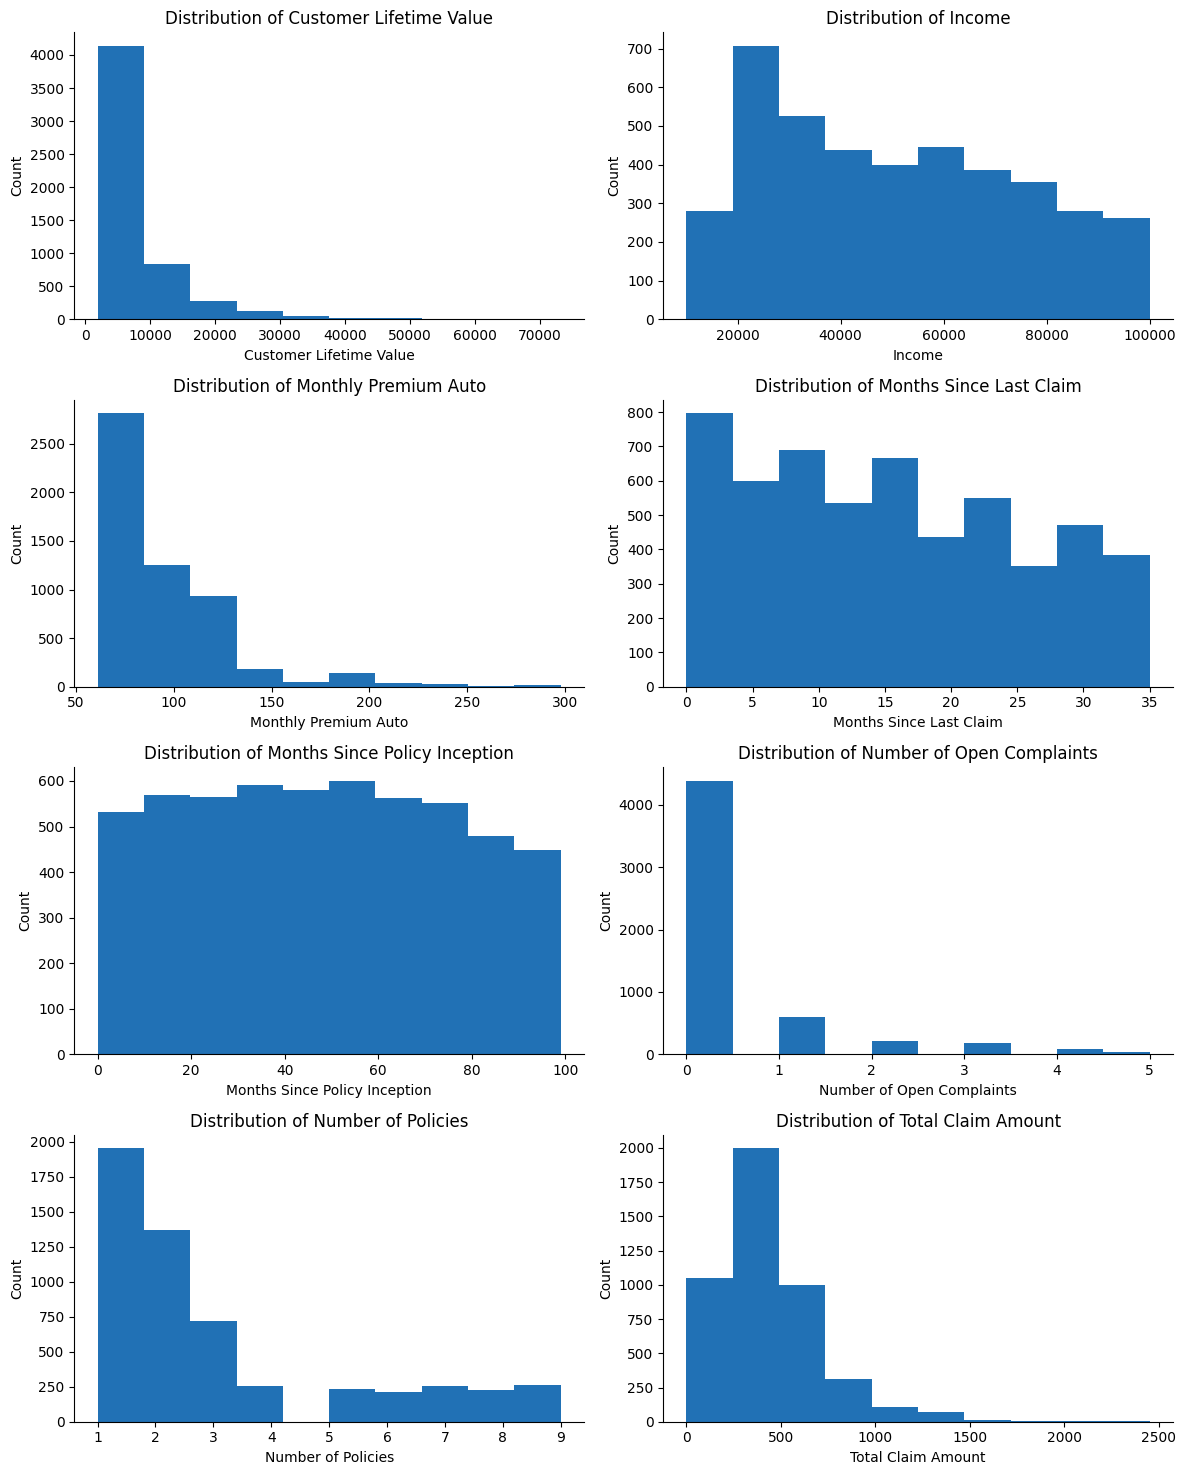

In [ ]:
numeric_columns = ['Customer Lifetime Value', 'Income','Monthly Premium Auto',
                  'Months Since Last Claim', 'Months Since Policy Inception',
                  'Number of Open Complaints', 'Number of Policies','Total Claim Amount', ]

# Buat subplot grid
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
fig.suptitle('', size=16, y=0.95)

# Flatten axes array
axes = axes.flatten()

# Plot histogram untuk setiap variabel numerik
for idx, col in enumerate(numeric_columns):
    sns.histplot(
        data=master,
        x=col,
        bins=10,
        ax=axes[idx],
        color='#2171b5',
        edgecolor=None,
        alpha=1
    )

    # Menyesuaikan tampilan
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

    # Menghilangkan grid
    axes[idx].grid(False)

    # Mengatur tampilan spine (garis bingkai)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

# Sesuaikan layout
plt.tight_layout()

# Tampilkan plot
plt.show()

#Exploratory Data Analysis

Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)

1. Tipe polis mana yang memiliki jumlah klaim rata-rata tertinggi?
2. Coverage apa yang paling banyak dimiliki oleh pengguna yang berstatus pekerjaan “Unemployed”
3. Bagaimana hubungan antara Monthly Premium Auto dengan Customer Lifetime Value dan Monthly Premium Auto dengan Coverage?
4. Apakah pelanggan dengan coverage 'Premium' cenderung memiliki Customer Lifetime Value yang lebih tinggi dibandingkan dengan mereka yang memiliki coverage 'Basic' atau 'Extended'?

Note: Mahasiswa perlu menambahkan dua poin eksplorasi sendiri.

td gua generate gpt gini

1. Analisis Hubungan antara Status Pernikahan dengan Klaim dan Customer Lifetime Value
2. Analisis Pengaruh Jenis Kendaraan (Vehicle Class) terhadap Jumlah Klaim

##1. Tipe polis mana yang memiliki jumlah klaim rata-rata tertinggi?

In [ ]:
# Menentukan jumlah klaim total berdasarkan tipe polis (termasuk nilai null)
total_claims = master.groupby('Policy Type')['Total Claim Amount'].sum(min_count=1)

# Menampilkan hasil
print("\nJumlah klaim berdasarkan tipe polis:\n")
print(total_claims)


Jumlah klaim berdasarkan tipe polis:

Policy Type
Corporate Auto    3.999487e+05
Personal Auto     1.476546e+06
Special Auto      8.520599e+04
Name: Total Claim Amount, dtype: float64


In [ ]:
# Menentukan tipe polis dengan jumlah klaim rata-rata tertinggi
average_claims = master.groupby('Policy Type')['Total Claim Amount'].mean().reset_index()

# Menampilkan hasil
print("\nJumlah klaim rata-rata berdasarkan tipe polis:\n")
average_claims


Jumlah klaim rata-rata berdasarkan tipe polis:



,Policy Type,Total Claim Amount
0,Corporate Auto,417.047638
1,Personal Auto,433.895320
2,Special Auto,423.910405


In [ ]:
# Menentukan tipe polis dengan jumlah klaim rata-rata tertinggi
highest_average_claim = average_claims['Total Claim Amount'].idxmax()
policy_name = average_claims.loc[highest_average_claim, 'Policy Type']

print(f"Tipe polis dengan jumlah klaim rata-rata tertinggi adalah: {policy_name}")

Tipe polis dengan jumlah klaim rata-rata tertinggi adalah: Personal Auto


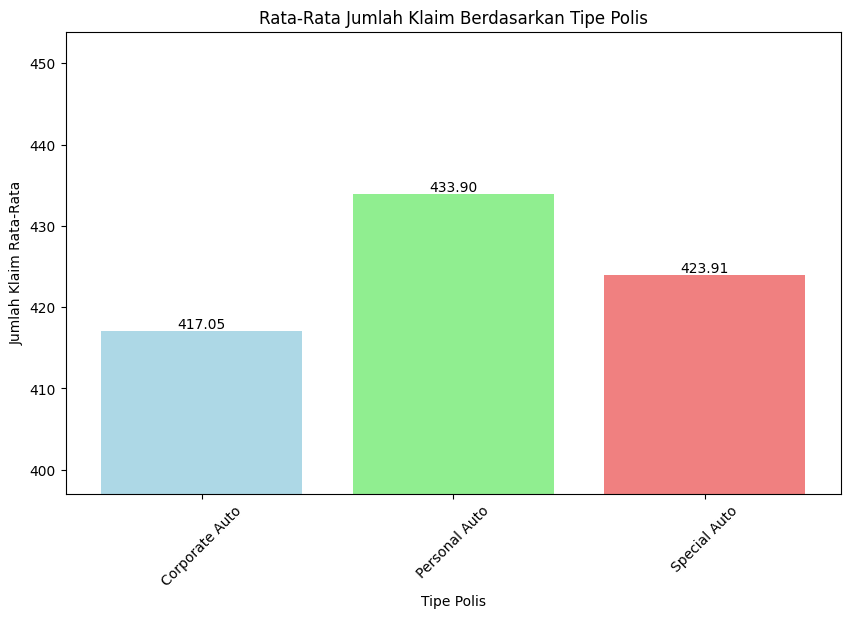

In [ ]:
# Membuat daftar warna untuk setiap batang (dengan hanya 3 warna)
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Membuat diagram batang untuk klaim rata-rata berdasarkan tipe polis dengan warna yang berbeda
plt.figure(figsize=(10, 6))
plt.bar(average_claims['Policy Type'], average_claims['Total Claim Amount'], color=colors[:len(average_claims)])
plt.title('Rata-Rata Jumlah Klaim Berdasarkan Tipe Polis')
plt.xlabel('Tipe Polis')
plt.ylabel('Jumlah Klaim Rata-Rata')

# Menyesuaikan rentang y-axis untuk memperjelas perbedaan
plt.ylim(average_claims['Total Claim Amount'].min() - 20, average_claims['Total Claim Amount'].max() + 20)

# Menambahkan label pada setiap batang untuk menampilkan nilai
for index, value in enumerate(average_claims['Total Claim Amount']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

Blox Plot digunakan untuk melihat bagaimana distribusi klaim tersebar di tiap tipe polis sehingga memberikan pemahaman apakah klaim cenderung berkisar di angka tertentu atau terdapat banyak variasi.

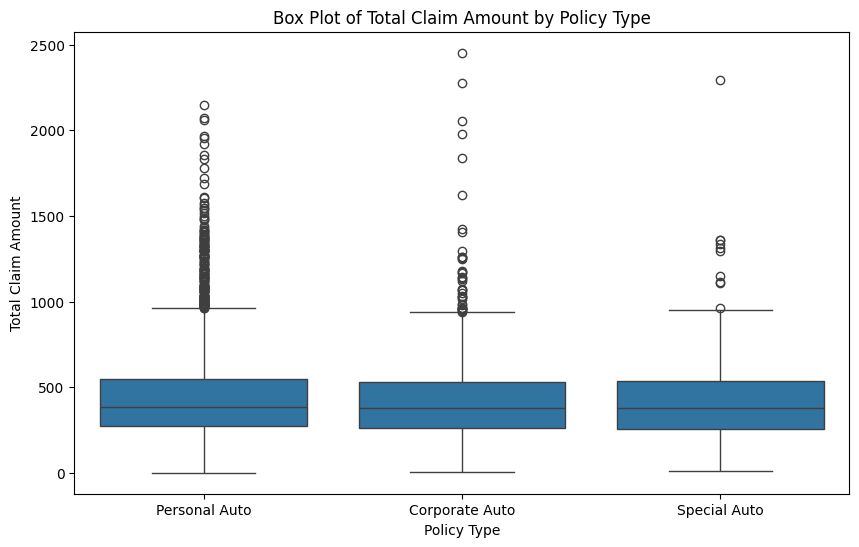

In [ ]:
# Membuat box plot untuk melihat apakah rata-rata tersebut diperoleh karena dominansi suatu outliers atau tidak

plt.figure(figsize=(10, 6))
sns.boxplot(x='Policy Type', y='Total Claim Amount', data=master)
plt.title('Box Plot of Total Claim Amount by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Total Claim Amount')
plt.show()

 Di semua jenis polis, kelihatan banget ada banyak outlier atau klaim yang jauh lebih besar dari biasanya, terutama di Personal Auto dan Corporate Auto. Itu nunjukin kalau ada beberapa kasus di mana klaimnya bisa jauh di atas rata-rata, meskipun mayoritas klaim ada di kisaran yang sama.

##2. Coverage apa yang paling banyak dimiliki oleh pengguna yang berstatus pekerjaan “Unemployed”

In [ ]:
# Memfilter data dengan status pekerjaan "Unemployed"
unemployed_data = master[master['EmploymentStatus'] == 'Unemployed']

# Menghitung frekuensi Coverage untuk pengguna "Unemployed"
coverage_counts = unemployed_data['Coverage'].value_counts()

# Menampilkan hasil
coverage_table = coverage_counts.reset_index()
coverage_table.columns = ['Coverage', 'Count']  # Mengubah nama kolom agar lebih informatif
print("Frekuensi Coverage untuk pengguna dengan status 'Unemployed':")
print(coverage_table)

Frekuensi Coverage untuk pengguna dengan status 'Unemployed':
   Coverage  Count
0     Basic    739
1  Extended    384
2   Premium    110


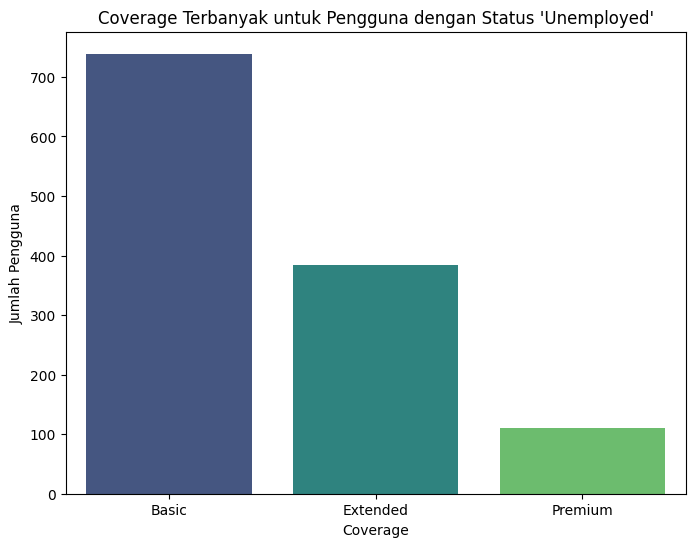

In [ ]:
# Membuat bar chart untuk Coverage dari pengguna yang "Unemployed"
plt.figure(figsize=(8, 6))
sns.barplot(x='Coverage', y='Count', data=coverage_table, palette="viridis", hue='Coverage', dodge=False)
plt.title("Coverage Terbanyak untuk Pengguna dengan Status 'Unemployed'")
plt.xlabel("Coverage")
plt.ylabel("Jumlah Pengguna")
plt.legend([],[], frameon=False)
plt.show()

In [ ]:
# Menghitung persentase Coverage untuk pengguna dengan status "Unemployed"
coverage_percentage = coverage_counts / coverage_counts.sum() * 100
coverage_percentage_table = coverage_percentage.reset_index()
coverage_percentage_table.columns = ['Coverage', 'Percentage']
print("Persentase Coverage untuk pengguna dengan status 'Unemployed':")
print(coverage_percentage_table)


Persentase Coverage untuk pengguna dengan status 'Unemployed':
   Coverage  Percentage
0     Basic   59.935118
1  Extended   31.143552
2   Premium    8.921330


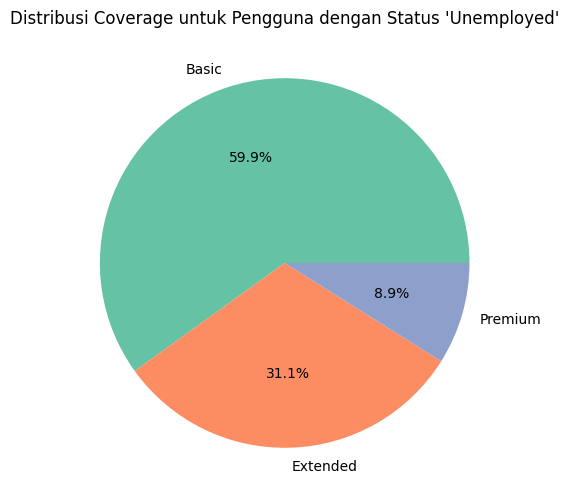

In [ ]:
# Membuat pie chart untuk persentase Coverage pengguna "Unemployed"
plt.figure(figsize=(8, 6))
plt.pie(coverage_percentage, labels=coverage_percentage.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Distribusi Coverage untuk Pengguna dengan Status 'Unemployed'")
plt.show()


In [ ]:
# Memfilter data untuk pengguna yang "Employed"
employed_data = master[master['EmploymentStatus'] != 'Unemployed']
employed_coverage_counts = employed_data['Coverage'].value_counts()

# Membandingkan frekuensi Coverage antara "Unemployed" dan "Employed"
comparison_df = pd.DataFrame({
    'Unemployed': coverage_counts,
    'Employed': employed_coverage_counts
}).fillna(0)  # Mengisi NaN dengan 0
print("Perbandingan Coverage antara Pengguna 'Unemployed' dan 'Employed':")
print(comparison_df)


Perbandingan Coverage antara Pengguna 'Unemployed' dan 'Employed':
          Unemployed  Employed
Coverage                      
Basic            739      2181
Extended         384      1069
Premium          110       331


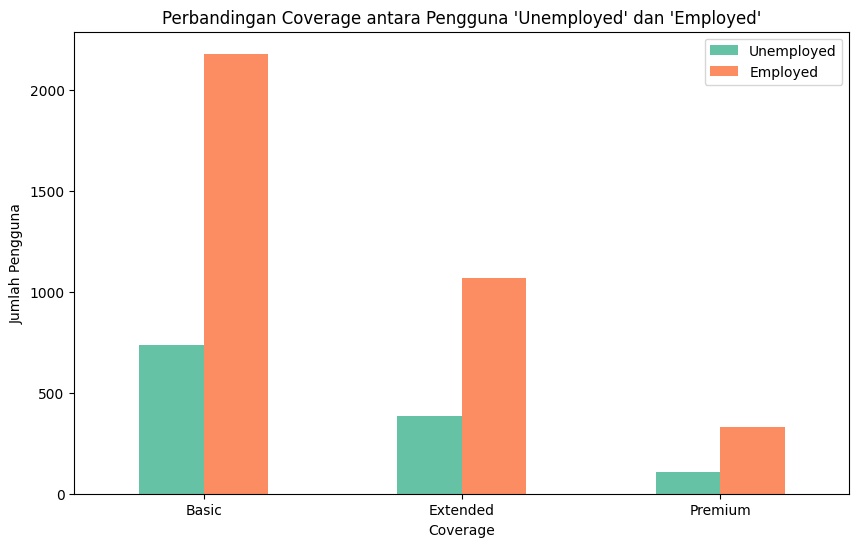

In [ ]:
# Visualisasi perbandingan Coverage antara "Unemployed" dan "Employed"
comparison_df.plot(kind='bar', figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title("Perbandingan Coverage antara Pengguna 'Unemployed' dan 'Employed'")
plt.xlabel("Coverage")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=0)
plt.legend(["Unemployed", "Employed"])
plt.show()

##3. Bagaimana hubungan antara Monthly Premium Auto dengan Customer Lifetime Value dan Monthly Premium Auto dengan Coverage?

In [ ]:
print("\nPercentage :")
print(master['Coverage'].value_counts(dropna=False, normalize=True).round(3) * 100, '%')


Percentage :
Coverage
Basic       53.3
Extended    26.5
NaN         12.2
Premium      8.0
Name: proportion, dtype: float64 %


In [ ]:
# Handle missing values pada 'Coverage' dengan mode (most frequent value) yaitu 'Basic'
master['Coverage'] = master['Coverage'].fillna(master['Coverage'].mode()[0])

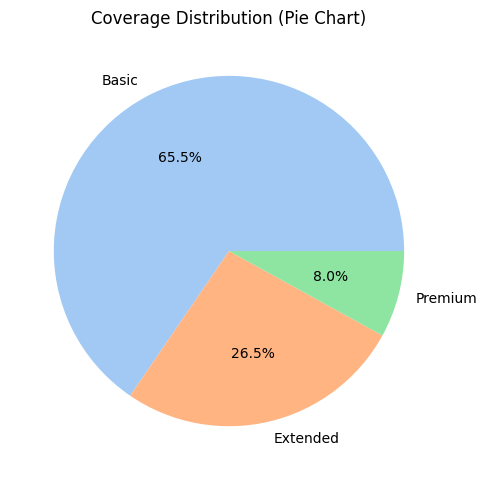

In [ ]:
# Distribusi Coverage menggunakan Pie Chart
coverage_counts = master['Coverage'].value_counts()
coverage_percentages = (coverage_counts / len(master) * 100).round(1)

plt.figure(figsize=(5, 5))
plt.pie(coverage_percentages.values,
        labels=coverage_percentages.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'))
plt.title('Coverage Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

Correlation coefficient: 0.402


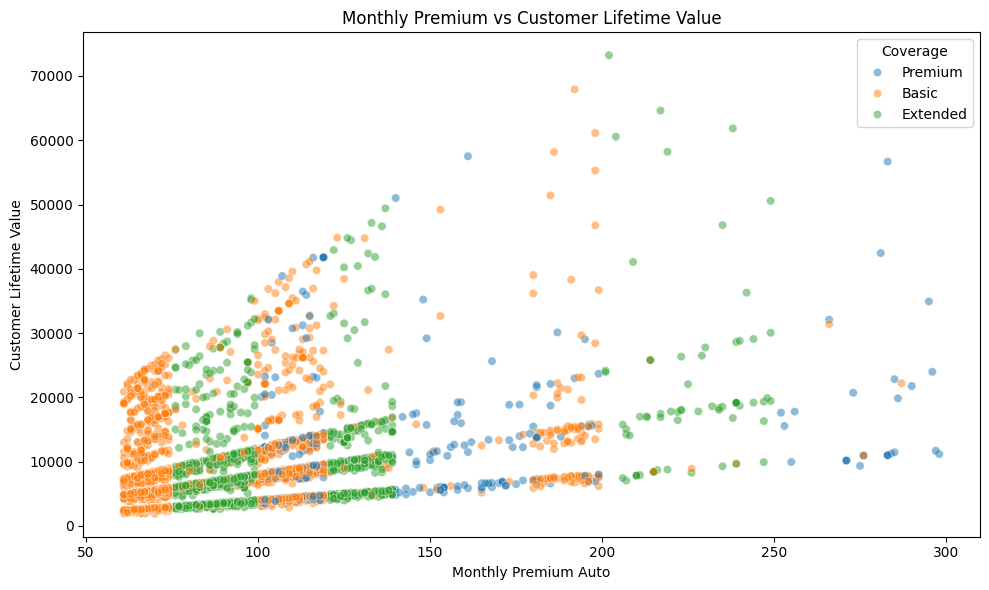

In [ ]:
# Hubungan antara Monthly Premium Auto dengan Customer Lifetime Value
correlation = master['Monthly Premium Auto'].corr(master['Customer Lifetime Value'])

print(f"Correlation coefficient: {correlation:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=master, x='Monthly Premium Auto', y='Customer Lifetime Value',
                alpha=0.5, hue='Coverage')
plt.title('Monthly Premium vs Customer Lifetime Value')
plt.tight_layout()
plt.show()

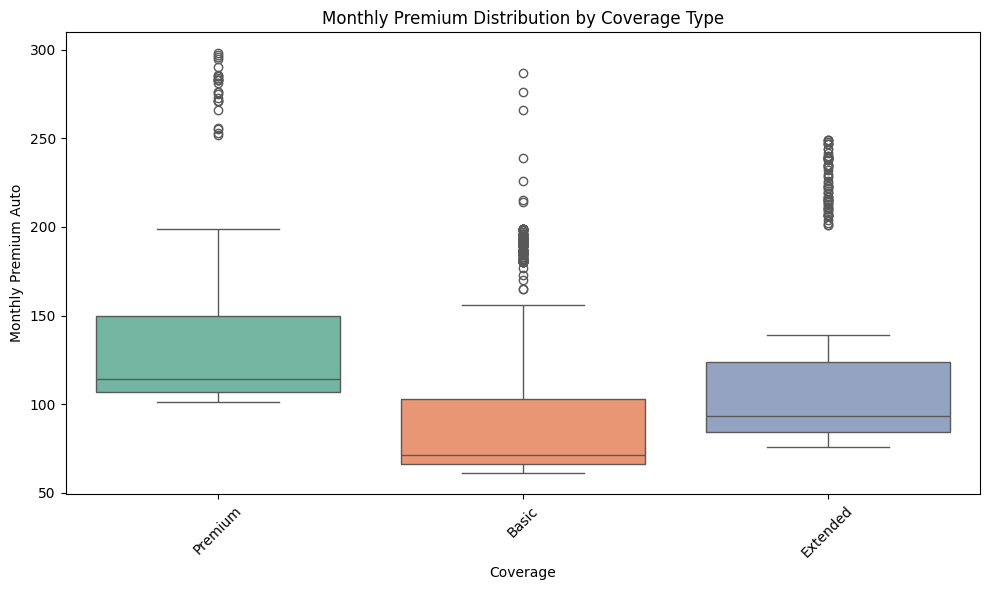

In [ ]:
# Hubungan antara Monthly Premium Auto dengan Coverage
plt.figure(figsize=(10, 6))
sns.boxplot(data=master, x='Coverage', y='Monthly Premium Auto', hue='Coverage', palette="Set2", dodge=False)
plt.title('Monthly Premium Distribution by Coverage Type')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

##4. Apakah Pelanggan dengan Coverage 'Premium' Cenderung memiliki Customer Lifetime Value yang lebih tinggi dibandingkan dengan mereka yang memiliki coverage 'Basic' atau 'Extended'?

In [ ]:
clv_coverage_data = master[['Customer Lifetime Value', 'Coverage']]
clv_coverage_data.head()

,Customer Lifetime Value,Coverage
0,29199.810720,Premium
1,2955.495724,Basic
2,5032.386371,Basic
3,4372.194536,Basic
4,5288.173294,Basic


In [ ]:
clv_by_coverage = clv_coverage_data.groupby('Coverage')['Customer Lifetime Value'].agg(['mean', 'median', 'count', 'std'])
print("\nStatistik Deskriptif CLV berdasarkan Coverage:")
print(clv_by_coverage)


Statistik Deskriptif CLV berdasarkan Coverage:
                  mean       median  count          std
Coverage                                               
Basic      7320.811937  5334.599587   3586  6254.157128
Extended   8839.845189  6618.016423   1453  7520.317272
Premium   10775.986581  8663.363959    441  8115.886531


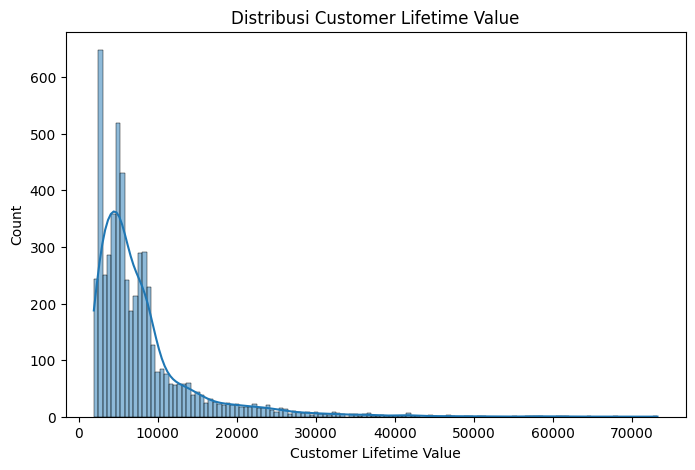

In [ ]:
# Distribusi Customer Lifetime Value
plt.figure(figsize=(8, 5))
sns.histplot(clv_coverage_data['Customer Lifetime Value'], kde=True)
plt.title('Distribusi Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.show()

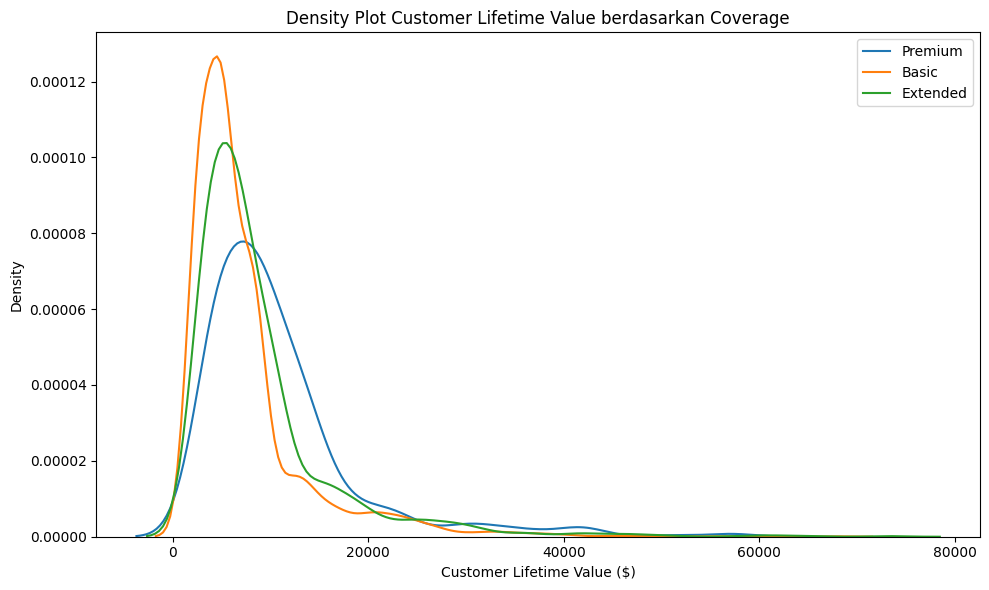

In [ ]:
# Distribusi Density Plot
plt.figure(figsize=(10, 6))
for coverage in clv_coverage_data['Coverage'].unique():
    subset = clv_coverage_data[clv_coverage_data['Coverage'] == coverage]['Customer Lifetime Value']
    sns.kdeplot(data=subset, label=coverage)
plt.title('Density Plot Customer Lifetime Value berdasarkan Coverage')
plt.xlabel('Customer Lifetime Value ($)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

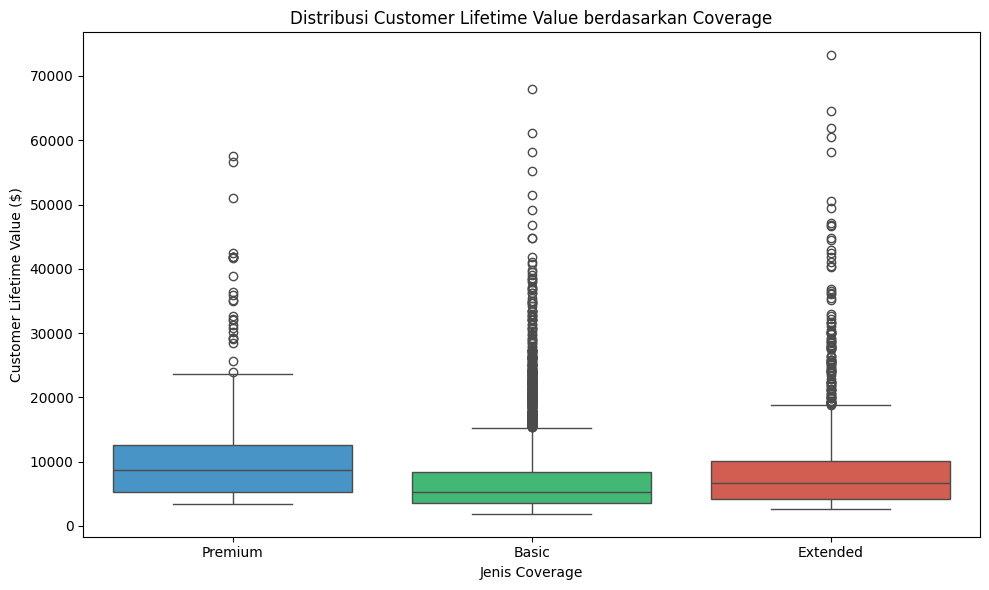

In [ ]:
# Visualisasi Box Plot
custom_palette = {"Premium": "#3498db",
                  "Basic": "#2ecc71",
                  "Extended": "#e74c3c"}

plt.figure(figsize=(10, 6))
sns.boxplot(x='Coverage', y ='Customer Lifetime Value', hue = 'Coverage',data =clv_coverage_data, palette=custom_palette)
plt.title('Distribusi Customer Lifetime Value berdasarkan Coverage')
plt.xlabel('Jenis Coverage')
plt.ylabel('Customer Lifetime Value ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

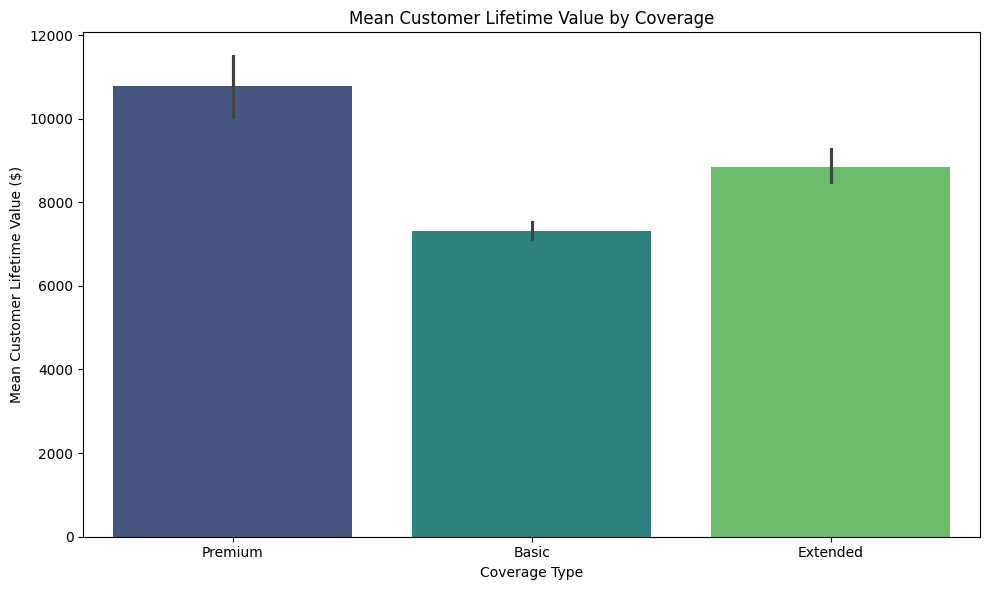

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coverage', y='Customer Lifetime Value', hue = "Coverage",data= clv_coverage_data, palette='viridis')
plt.title('Mean Customer Lifetime Value by Coverage')
plt.xlabel('Coverage Type')
plt.ylabel('Mean Customer Lifetime Value ($)')
plt.tight_layout()
plt.show()

## 5. Apakah nilai pelanggan meningkat seiring bertambahnya durasi hubungan mereka dengan perusahaan?

Korelasi antara lama berlangganan dengan nilai pelanggan: 0.01

Rata-rata nilai pelanggan berdasarkan lama berlangganan:
Duration_Group
Sangat Baru    8027.16
Baru           7592.63
Menengah       8087.81
Lama           8443.83
Sangat Lama    7831.33
Name: Customer Lifetime Value, dtype: float64


<ipython-input-5-07efac1d8c23>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_analysis = master.groupby('Duration_Group')['Customer Lifetime Value'].mean().round(2)


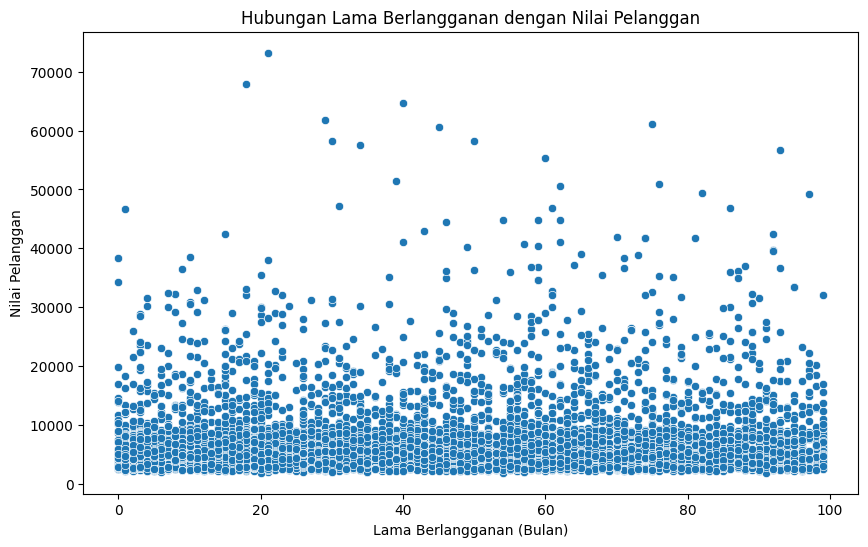

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=master, x='Months Since Policy Inception', y='Customer Lifetime Value')
plt.title('Hubungan Lama Berlangganan dengan Nilai Pelanggan')
plt.xlabel('Lama Berlangganan (Bulan)')
plt.ylabel('Nilai Pelanggan')

# Menghitung korelasi
correlation = master['Months Since Policy Inception'].corr(master['Customer Lifetime Value'])
print(f"Korelasi antara lama berlangganan dengan nilai pelanggan: {correlation:.2f}")

# Membuat kelompok berdasarkan lama berlangganan
master['Duration_Group'] = pd.qcut(master['Months Since Policy Inception'], q=5, labels=['Sangat Baru', 'Baru', 'Menengah', 'Lama', 'Sangat Lama'])

# Rata-rata nilai pelanggan per kelompok durasi
duration_analysis = master.groupby('Duration_Group')['Customer Lifetime Value'].mean().round(2)
print("\nRata-rata nilai pelanggan berdasarkan lama berlangganan:")
print(duration_analysis)

##Explorasi hubungan antara Education, Income dan Total Klaim dari sini




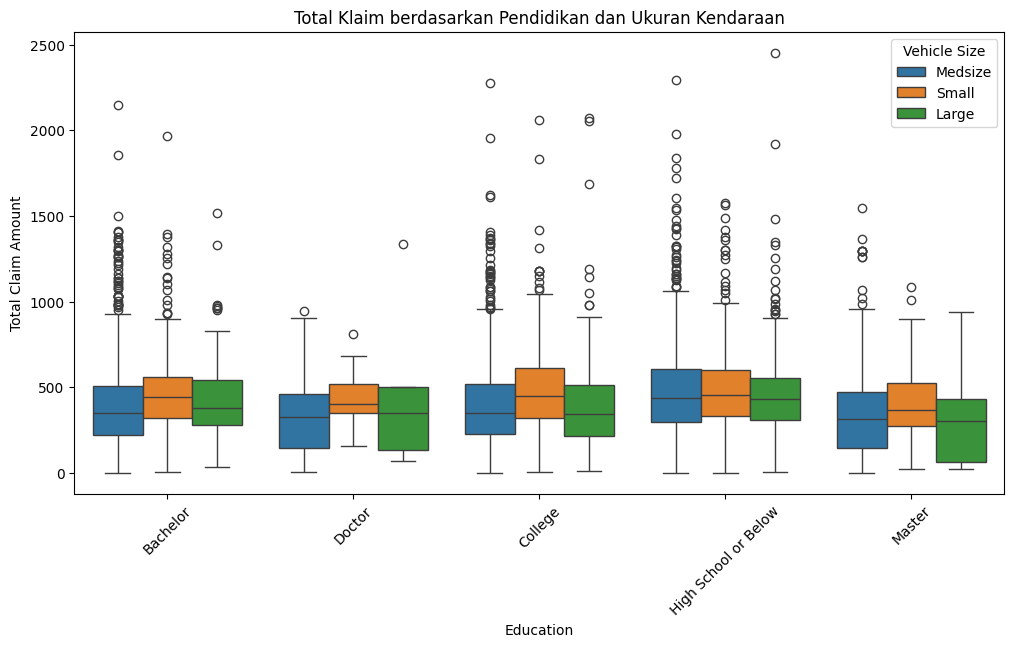


Rata-rata Klaim berdasarkan Pendidikan dan Ukuran Kendaraan:
Vehicle Size           Large  Medsize   Small
Education                                    
Bachelor              433.42   401.33  479.03
College               422.50   400.24  497.88
Doctor                385.41   323.88  430.73
High School or Below  488.97   471.70  513.23
Master                287.92   352.92  404.00


In [ ]:
# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=master, x='Education', y='Total Claim Amount', hue='Vehicle Size')
plt.title('Total Klaim berdasarkan Pendidikan dan Ukuran Kendaraan')
plt.xticks(rotation=45)
plt.show()

# Rata-rata klaim berdasarkan pendidikan dan ukuran kendaraan
edu_vehicle_stats = master.groupby(['Education', 'Vehicle Size'])['Total Claim Amount'].mean().unstack()
print("\nRata-rata Klaim berdasarkan Pendidikan dan Ukuran Kendaraan:")
print(edu_vehicle_stats.round(2))

# Data Preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer # jika tidak bisa, jalankan command "pip install yellowbrick"
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

#### **Read Data**

In [ ]:
id_drive = "1F8alZd_3IjVQZ5LdMAIUj_6o75OJWT4U"
# Sama aja, insurance_customer_train.csv
data = pd.read_csv('https://drive.google.com/uc?id=' + id_drive)

In [ ]:
data.head(200)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,XA28126,California,29199.810720,0,Premium,Bachelor,2/12/11,Employed,M,67739.0,...,76,0,2,Personal Auto,Personal L3,Offer1,Agent,270.373444,SUV,Medsize
1,EH27304,California,2955.495724,0,NaN,Doctor,1/21/11,Employed,F,56502.0,...,78,0,1,Personal Auto,Personal L1,Offer3,Branch,355.200000,Four-Door Car,Medsize
2,QS83113,Oregon,5032.386371,0,Basic,Bachelor,1/10/11,Employed,M,30735.0,...,43,0,7,Personal Auto,Personal L3,Offer1,Agent,NaN,Two-Door Car,Small
3,YP32443,Oregon,4372.194536,0,Basic,Bachelor,1/23/11,Medical Leave,M,20354.0,...,0,0,1,Personal Auto,Personal L1,Offer3,Agent,556.800000,SUV,Medsize
4,HP94242,Arizona,5288.173294,0,NaN,Bachelor,1/17/11,Employed,F,42621.0,...,3,0,3,Personal Auto,Personal L1,Offer2,Call Center,316.800000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,JK57654,California,10972.067780,1,Extended,Doctor,1/18/11,Employed,M,24164.0,...,40,0,5,Personal Auto,Personal L3,Offer2,Agent,657.600000,Sports Car,Medsize
196,LH92841,Washington,7255.953792,0,Extended,Bachelor,2/5/11,Employed,F,88891.0,...,56,0,3,Personal Auto,Personal L2,Offer1,Branch,50.528355,Four-Door Car,Medsize
197,JR89623,California,2698.693364,0,Basic,High School or Below,2/21/11,Employed,F,76025.0,...,0,0,1,Corporate Auto,Corporate L3,Offer2,Branch,151.021648,Four-Door Car,Medsize
198,SR71812,California,6473.325620,0,Extended,High School or Below,1/27/11,Unemployed,F,NaN,...,99,0,6,Personal Auto,Personal L3,Offer1,Agent,468.492761,Four-Door Car,Small


In [ ]:
# Menampilkan semua nilai unik di kolom 'Education'
print(data['Education'].unique())


['Bachelor' 'Doctor' 'College' 'High School or Below' 'Master']


In [ ]:
print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])

Jumlah baris: 5480
Jumlah kolom: 24


#### Handle Inconsistent

In [ ]:
for col in data.select_dtypes(include=object).columns:
    print('Number of unique values in column '+col+':')
    print(data[col].value_counts(),'\n')

Number of unique values in column Customer:
Customer
XA28126    1
OM69210    1
RI24911    1
EM77767    1
FR46645    1
          ..
IZ55070    1
QC35222    1
SF11920    1
GI55977    1
JM59803    1
Name: count, Length: 5480, dtype: int64 

Number of unique values in column State:
State
California    1905
Oregon        1535
Arizona       1018
Nevada         542
Washington     480
Name: count, dtype: int64 

Number of unique values in column Coverage:
Coverage
Basic       2920
Extended    1453
Premium      441
Name: count, dtype: int64 

Number of unique values in column Education:
Education
Bachelor                1656
High School or Below    1587
College                 1584
Master                   453
Doctor                   200
Name: count, dtype: int64 

Number of unique values in column Effective To Date:
Effective To Date
1/31/11    116
2/14/11    114
1/27/11    113
1/3/11     111
1/17/11    109
1/11/11    109
1/26/11    108
2/10/11    106
2/22/11    104
2/27/11    104
1/10/11    

#### Handle Duplicates

In [ ]:
print("Jumlah duplikasi data : " + str(data.duplicated().sum()))

Jumlah duplikasi data : 0


Dataset ini tidak mempunyai baris duplikat sehingga tidak perlu dilakukan penanganan.

#### Handle Missing Values

In [ ]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na *100 / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
check_null(data)

                    Total    Percent
Coverage              666  12.153285
Total Claim Amount    917  16.733577
Income               1404  25.620438


Terlihat bahwa dataset ini mempunyai banyak missing values (null) pada Coverage, Total Claim Amount, dan Income sehingga perlu dilakukan penanganan.

Akan dilakukan imputasi yang sesuai untuk menggantikan nilai null tersebut yakni mean atau median untuk atribut numerik (sesuai dengan distribusi data) dan modus untuk atribut kategorikal.

In [ ]:
# Check Skewness untuk Semua Atribut Numerik
data.select_dtypes(include=["int64", "float64"]).skew().sort_values(ascending=False)

,0
Customer Lifetime Value,3.038186
Number of Open Complaints,2.828185
Monthly Premium Auto,2.147525
Response,2.047900
Total Claim Amount,1.538268
Number of Policies,1.263218
Income,0.283497
Months Since Last Claim,0.266202
Months Since Policy Inception,0.043698


Interpretasi nilai skewness :

* Jika nilainya positif maka right skewed (buntut kanan > buntut kiri)
* Jika nilainya negatif maka left skewed (buntut kiri > buntut kanan)
* Jika skewness = 0, data simetris

Nilai skewness 0.4 hingga -0.4 merupakan *reasonable cutoffs* (batas wajar) untuk sampel besar, sehingga data yang berada di rentang ini skewnessnya akan dianggap 0 (terdistribusi normal)

Oleh karena itu, ```Income, Months Since Last Claim, dan Months Since Policy Inception``` dapat dianggap berdistribusi normal, sedangkan ```Customer Lifetime Value, Number of Open Complaints, Monthly Premium Auto, Response, Total Claim Amount, dan Number of Policies``` memiliki karakteristik right skewed.

Imputasi nilai null akan menggunakan mean untuk data terdistribusi normal, median untuk data skewed, dan modus untuk data kategorikal.

Referensi : https://pythontic.com/pandas/dataframe-computations/skew#google_vignette
https://jse.amstat.org/v19n2/doane.pdf


In [ ]:
# Imputasi data null
numerical_normal = ['Income']
data[numerical_normal] = data[numerical_normal].fillna(data[numerical_normal].mean())

numerical_skewed = ['Total Claim Amount']
data[numerical_skewed] = data[numerical_skewed].fillna(data[numerical_skewed].median())

categorical = ['Coverage']
data[categorical] = data[categorical].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
check_null(data)

Tidak ditemukan missing value pada dataset


#### Handle Outliers

In [ ]:
# Fungsi untuk menghitung batas IQR
def calculate_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Fungsi untuk melakukan capping pada outliers
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Menentukan kolom numerik
numerical_columns = data.select_dtypes(include=["number"]).columns

# Salin data asli untuk analisis sebelum capping
data_original = data.copy()

# List untuk menyimpan hasil
outliers_summary = []

# Fungsi untuk menghitung jumlah outliers
def detect_outliers_count(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    below_lower_bound = len(df[df[column] < lower_bound])
    above_upper_bound = len(df[df[column] > upper_bound])
    total_outliers = below_lower_bound + above_upper_bound
    return total_outliers

# Iterasi pada setiap kolom numerik
for col in numerical_columns:
    # Hitung outliers sebelum capping pada data asli
    outliers_before = detect_outliers_count(data_original, col)

    # Hitung batas IQR dan lakukan capping
    lower, upper = calculate_iqr_bounds(data, col)
    cap_outliers(data, col, lower, upper)

    # Hitung outliers setelah capping pada data yang sudah dimodifikasi
    outliers_after = detect_outliers_count(data, col)

    # Simpan hasilnya
    outliers_summary.append({
        "Column": col,
        "Outliers Before": outliers_before,
        "Outliers After": outliers_after
    })

# Mengubah hasil menjadi DataFrame untuk tampilan yang lebih rapi
outliers_summary_df = pd.DataFrame(outliers_summary)

# Menampilkan hasil
print("Summary of Outliers Before and After Capping:")
print(outliers_summary_df)

Summary of Outliers Before and After Capping:
                          Column  Outliers Before  Outliers After
0        Customer Lifetime Value              495               0
1                       Response              780               0
2                         Income                0               0
3           Monthly Premium Auto              261               0
4        Months Since Last Claim                0               0
5  Months Since Policy Inception                0               0
6      Number of Open Complaints             1098               0
7             Number of Policies              264               0
8             Total Claim Amount              376               0


#### Encoding Categorical Data


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Daftar kolom kategorikal yang memerlukan encoding
categorical_columns = [
    "State", "Coverage", "Education", "EmploymentStatus", "Gender",
    "Location Code", "Marital Status", "Policy Type", "Policy",
    "Renew Offer Type", "Sales Channel", "Vehicle Class", "Vehicle Size"
]

# One-Hot Encoding untuk kolom non-ordinal (tidak termasuk Effective To Date)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Gunakan sparse_output untuk versi terbaru
categorical_non_ordinal = [
    "State", "Coverage", "EmploymentStatus", "Gender",
    "Location Code", "Marital Status", "Policy Type",
    "Renew Offer Type", "Sales Channel", "Vehicle Class", "Vehicle Size", "Policy"
]
encoded_columns = one_hot_encoder.fit_transform(data[categorical_non_ordinal])

# Menyimpan hasil One-Hot Encoding dalam DataFrame
encoded_df = pd.DataFrame(
    encoded_columns,
    columns=one_hot_encoder.get_feature_names_out(categorical_non_ordinal),
    index=data.index
)

# Menggabungkan hasil encoding dengan dataset asli
data = pd.concat([data.drop(columns=categorical_non_ordinal), encoded_df], axis=1)

# Label Encoding untuk kolom ordinal (Education)
education_mapping = {"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4}
data["Education"] = data["Education"].map(education_mapping)

# Menyimpan dataset hasil encoding (opsional)
data.to_csv('insurance_customer_encoded.csv', index=False)

# Menampilkan beberapa baris pertama dataset hasil encoding
print(data.head())


  Customer  Customer Lifetime Value  Response  Education Effective To Date  \
0  XA28126             16344.298266       0.0          2           2/12/11   
1  EH27304              2955.495724       0.0          4           1/21/11   
2  QS83113              5032.386371       0.0          2           1/10/11   
3  YP32443              4372.194536       0.0          2           1/23/11   
4  HP94242              5288.173294       0.0          2           1/17/11   

    Income  Monthly Premium Auto  Months Since Last Claim  \
0  67739.0                 149.0                      4.0   
1  56502.0                  74.0                     15.0   
2  30735.0                  63.0                      4.0   
3  20354.0                 116.0                     23.0   
4  42621.0                  66.0                      8.0   

   Months Since Policy Inception  Number of Open Complaints  ...  \
0                           76.0                        0.0  ...   
1                           

In [ ]:
# Periksa tipe data setiap kolom
print("Tipe data setiap kolom:")
print(data.dtypes)

# Identifikasi kolom non-numerik
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("\nKolom non-numerik yang belum di-encode (jika ada):")
print(non_numeric_columns)

# Tampilkan beberapa baris dataset untuk memastikan hasil encoding
print("\nContoh beberapa baris dataset:")
print(data.head())


Tipe data setiap kolom:
Customer                           object
Customer Lifetime Value           float64
Response                          float64
Education                           int64
Effective To Date                  object
Income                            float64
Monthly Premium Auto              float64
Months Since Last Claim           float64
Months Since Policy Inception     float64
Number of Open Complaints         float64
Number of Policies                float64
Total Claim Amount                float64
State_California                  float64
State_Nevada                      float64
State_Oregon                      float64
State_Washington                  float64
Coverage_Extended                 float64
Coverage_Premium                  float64
EmploymentStatus_Employed         float64
EmploymentStatus_Medical Leave    float64
EmploymentStatus_Retired          float64
EmploymentStatus_Unemployed       float64
Gender_M                          float64
Location C

# Classification

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import uniform, randint

# Load datasets
id_train = "1F8alZd_3IjVQZ5LdMAIUj_6o75OJWT4U"
id_test = "188hlGxTI3kKdJXjgDz4ouU2gV6NEz3KU"

train_data = pd.read_csv('https://drive.google.com/uc?id=' + id_train)
test_data = pd.read_csv('https://drive.google.com/uc?id=' + id_test)

# Handle duplicates
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

# Impute missing values
numerical_normal = ['Income']
train_data[numerical_normal] = train_data[numerical_normal].fillna(train_data[numerical_normal].mean())
test_data[numerical_normal] = test_data[numerical_normal].fillna(test_data[numerical_normal].mean())

numerical_skewed = ['Total Claim Amount']
train_data[numerical_skewed] = train_data[numerical_skewed].fillna(train_data[numerical_skewed].median())
test_data[numerical_skewed] = test_data[numerical_skewed].fillna(test_data[numerical_skewed].median())

categorical = ['Coverage']
train_data[categorical] = train_data[categorical].apply(lambda x: x.fillna(x.mode()[0]))
test_data[categorical] = test_data[categorical].apply(lambda x: x.fillna(x.mode()[0]))

# Preprocessing
y_train = train_data['Response']
X_train = train_data.drop(columns=['Customer', 'Response'], axis=1)

# Define X_test
X_test = test_data.drop(columns=['Customer'], axis=1)

# Identify numerical and categorical columns
numerical_features = X_test.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_test.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]).toarray())
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]).toarray())

# Rename columns for encoded features
X_train_encoded.columns = encoder.get_feature_names_out(categorical_features)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Combine encoded categorical features with numerical features
X_train_preprocessed = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_encoded], axis=1)
X_test_preprocessed = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_encoded], axis=1)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(10, 50),
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': uniform(0.7, 1.0)
}

# Initialize LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_train_preprocessed, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Train model with best parameters
best_lgbm_model = random_search.best_estimator_
best_lgbm_model.fit(X_train_preprocessed, y_train)

# Predict responses for the test dataset
y_test_pred = best_lgbm_model.predict(X_test_preprocessed)

# Create the submission dataframe
submission = pd.DataFrame({
    'Customer': test_data['Customer'],
    'Response': y_test_pred
})

# Save the submission file
submission_file_path = '5tes_submission.csv'
submission.to_csv(submission_file_path, index=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 780, number of negative: 4700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 5480, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142336 -> initscore=-1.796024
[LightGBM] [Info] Start training from score -1.796024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

# Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import lightgbm as lgb

# Load datasets
id_train = "1F8alZd_3IjVQZ5LdMAIUj_6o75OJWT4U"
id_test = "188hlGxTI3kKdJXjgDz4ouU2gV6NEz3KU"

train_data_regress1 = pd.read_csv('https://drive.google.com/uc?id=' + id_train)
test_data_regress1 = pd.read_csv('https://drive.google.com/uc?id=' + id_test)

# Drop unnecessary columns
train_data_cleaned = train_data_regress1.drop(columns=['Customer', 'Effective To Date'])
test_data_cleaned = test_data_regress1.drop(columns=['Customer', 'Effective To Date'])

# Handle missing values
train_data_cleaned.fillna(train_data_cleaned.median(numeric_only=True), inplace=True)
test_data_cleaned.fillna(test_data_cleaned.median(numeric_only=True), inplace=True)

# Encode categorical features
categorical_cols = train_data_cleaned.select_dtypes(include='object').columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    train_data_cleaned[col] = label_encoders[col].fit_transform(train_data_cleaned[col].astype(str))
    test_data_cleaned[col] = label_encoders[col].transform(test_data_cleaned[col].astype(str))

# Separate features and target
X = train_data_cleaned.drop(columns=['Customer Lifetime Value'])
y = train_data_cleaned['Customer Lifetime Value']

# Ensure test data has the same columns as training data
missing_cols = set(X.columns) - set(test_data_cleaned.columns)
for col in missing_cols:
    test_data_cleaned[col] = 0  # Add missing columns with default values (e.g., 0)

# Align columns of test data with training data
test_data_features = test_data_cleaned[X.columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data_features)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10],
    'num_leaves': [31, 50, 100],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_lgb_model = grid_search.best_estimator_

# Predict on validation set with the best model
y_val_pred = best_lgb_model.predict(X_val)

# Evaluate the model
r2 = r2_score(y_val, y_val_pred)
print(f"Validation R2 Score: {r2}")

# Predict on test data
test_predictions = best_lgb_model.predict(test_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'Customer': test_data_regress1['Customer'],
    'Customer Lifetime Value': test_predictions
})

# Save to CSV
submission_file_path = '2reg_submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 4384, number of used features: 21
[LightGBM] [Info] Start training from score 8057.691382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#Clustering

In [ ]:
# Load dataset dari Google Drive
import pandas as pd

id_clustering_data = "1F8alZd_3IjVQZ5LdMAIUj_6o75OJWT4U"
data = pd.read_csv(f'https://drive.google.com/uc?id={id_clustering_data}')

# Menampilkan 5 baris pertama untuk melihat struktur data
print("Preview Dataset:")
print(data.head())

# Mengecek jumlah duplikasi dalam data
duplicate_count = data.duplicated().sum()

# Menampilkan hasil cek duplikat
print("\nJumlah data duplikat:", duplicate_count)

# Mengecek jumlah missing values di setiap kolom
missing_values = data.isnull().sum()

# Menampilkan kolom dengan missing values
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Contoh penanganan missing values:
# - Kolom numerik: Mengisi dengan median
# - Kolom kategori: Mengisi dengan modus
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            # Mengisi missing values dengan modus untuk kolom kategori
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            # Mengisi missing values dengan median untuk kolom numerik
            data[column].fillna(data[column].median(), inplace=True)

# Mengecek ulang untuk memastikan tidak ada missing values
missing_values_after = data.isnull().sum()

print("\nMissing Values after handling:")
print(missing_values_after[missing_values_after > 0])

# Menampilkan info dataset setelah penanganan missing values
print("Info Dataset:")
print(data.info())

# Menampilkan ringkasan statistik kolom numerik
print("\nDescriptive Statistics (Numerik):")
print(data.describe())

# Menampilkan distribusi nilai unik di kolom kategori
print("\nUnique Values in Categorical Columns:")
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Feature Selection
# Menghapus kolom yang tidak relevan untuk clustering
# Contoh: Kolom 'Customer' (ID unik) dan kolom waktu 'Effective To Date'

selected_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount',
    'State', 'Coverage', 'EmploymentStatus', 'Location Code', 'Marital Status',
    'Policy Type', 'Vehicle Class', 'Vehicle Size'
]

# Membuat dataset baru dengan fitur yang terpilih
data_clustering = data[selected_features]

# Menampilkan dataset hasil seleksi fitur
print("Dataset setelah Feature Selection:")
print(data_clustering.head())

from sklearn.preprocessing import LabelEncoder

# Mengidentifikasi kolom kategori
categorical_columns = [
    'State', 'Coverage', 'EmploymentStatus', 'Location Code',
    'Marital Status', 'Policy Type', 'Vehicle Class', 'Vehicle Size'
]

# Membuat encoder untuk setiap kolom kategori
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_clustering[col] = le.fit_transform(data_clustering[col])
    label_encoders[col] = le

# Menampilkan dataset setelah encoding
print("Dataset setelah Encoding:")
print(data_clustering.head())

from sklearn.preprocessing import StandardScaler

# Daftar kolom numerik yang perlu dinormalisasi
numerical_columns = [
    'Customer Lifetime Value', 'Income',
    'Monthly Premium Auto', 'Total Claim Amount'
]

# Inisialisasi scaler
scaler = StandardScaler()

# Menormalisasi kolom numerik
data_clustering[numerical_columns] = scaler.fit_transform(data_clustering[numerical_columns])

# Menampilkan dataset setelah normalisasi
print("Dataset setelah Normalisasi:")
print(data_clustering.head())



Preview Dataset:
  Customer       State  Customer Lifetime Value  Response Coverage Education  \
0  XA28126  California             29199.810720         0  Premium  Bachelor   
1  EH27304  California              2955.495724         0      NaN    Doctor   
2  QS83113      Oregon              5032.386371         0    Basic  Bachelor   
3  YP32443      Oregon              4372.194536         0    Basic  Bachelor   
4  HP94242     Arizona              5288.173294         0      NaN  Bachelor   

  Effective To Date EmploymentStatus Gender   Income  ...  \
0           2/12/11         Employed      M  67739.0  ...   
1           1/21/11         Employed      F  56502.0  ...   
2           1/10/11         Employed      M  30735.0  ...   
3           1/23/11    Medical Leave      M  20354.0  ...   
4           1/17/11         Employed      F  42621.0  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                            76                       

<ipython-input-130-c7f277c5f277>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-130-c7f277c5f277>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# PCA dengan 1 komponen
pca_1d = PCA(n_components=1)
data_pca_1d = pca_1d.fit_transform(data_clustering)

print("Explained Variance Ratio oleh komponen tunggal:", pca_1d.explained_variance_ratio_)

# K-Means pada PCA 1 dimensi
range_n_clusters = range(2, 11)
silhouette_scores_pca_1d = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca_1d)
    score = silhouette_score(data_pca_1d, cluster_labels)
    silhouette_scores_pca_1d.append(score)

for n, score in zip(range_n_clusters, silhouette_scores_pca_1d):
    print(f"Jumlah Cluster (PCA 1D): {n}, Silhouette Score: {score:.4f}")


Explained Variance Ratio oleh komponen tunggal: [0.32492627]
Jumlah Cluster (PCA 1D): 2, Silhouette Score: 0.8430
Jumlah Cluster (PCA 1D): 3, Silhouette Score: 0.8659
Jumlah Cluster (PCA 1D): 4, Silhouette Score: 0.8548
Jumlah Cluster (PCA 1D): 5, Silhouette Score: 0.8629
Jumlah Cluster (PCA 1D): 6, Silhouette Score: 0.7071
Jumlah Cluster (PCA 1D): 7, Silhouette Score: 0.6779
Jumlah Cluster (PCA 1D): 8, Silhouette Score: 0.6568
Jumlah Cluster (PCA 1D): 9, Silhouette Score: 0.6063
Jumlah Cluster (PCA 1D): 10, Silhouette Score: 0.5698


<ipython-input-132-474137d36d63>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['Cluster'] = kmeans.fit_predict(data_clustering)


=== Analisis Variabel Numerik per Cluster ===
        Customer Lifetime Value              Income            \
                           mean       std      mean       std   
Cluster                                                         
0                       6565.19   4909.39  49891.41  20987.60   
1                       7515.12   5341.03  51917.11  22964.86   
2                      13276.92  10886.51  45655.23  15348.08   

        Monthly Premium Auto        Total Claim Amount          
                        mean    std               mean     std  
Cluster                                                         
0                      77.28  14.66             353.56  177.70  
1                      91.58  22.80             359.18  165.17  
2                     145.65  44.84             750.79  352.08  

=== Analisis Variabel Kategorikal per Cluster ===

Distribusi State per cluster:
State    Arizona  California  Nevada  Oregon  Washington
Cluster                           

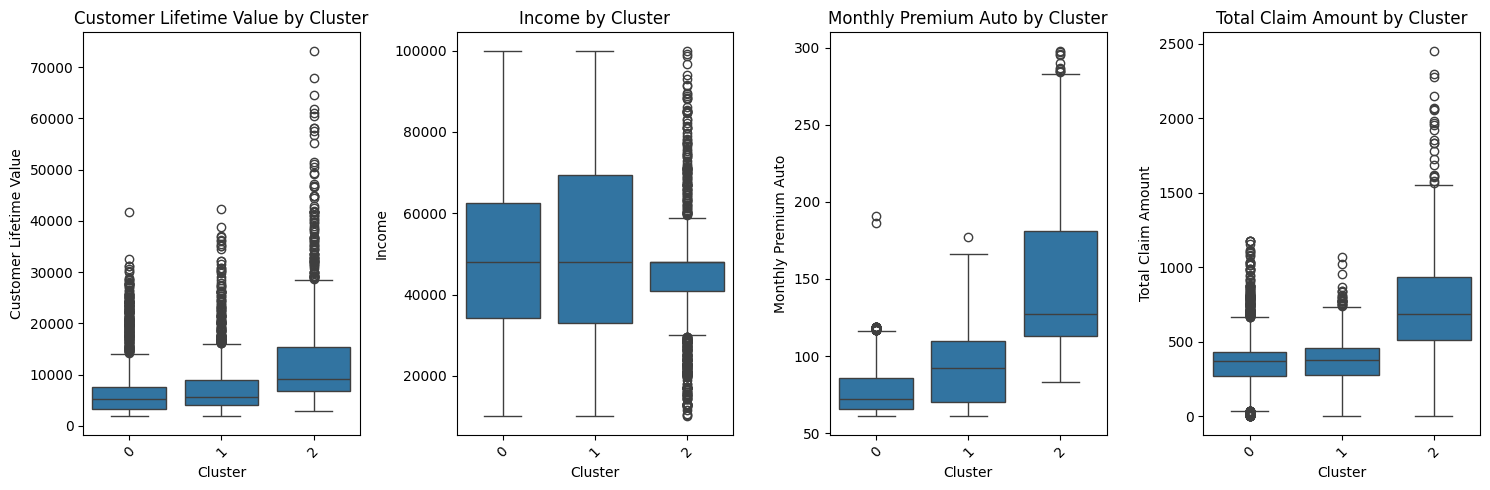


=== Ukuran Cluster ===
Cluster 0: 2713 pelanggan (49.51%)
Cluster 1: 1857 pelanggan (33.89%)
Cluster 2: 910 pelanggan (16.61%)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Berdasarkan Silhouette Score sebelumnya, kita menggunakan 3 cluster
# karena memiliki nilai tertinggi (0.8659)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering)

# Menambahkan hasil cluster ke dataset asli
data['Cluster'] = data_clustering['Cluster']

# Analisis karakteristik setiap cluster
def analyze_clusters(data, numerical_columns, categorical_columns):
    # Analisis variabel numerik
    print("=== Analisis Variabel Numerik per Cluster ===")
    numeric_analysis = data.groupby('Cluster')[numerical_columns].agg(['mean', 'std']).round(2)
    print(numeric_analysis)

    # Analisis variabel kategorikal
    print("\n=== Analisis Variabel Kategorikal per Cluster ===")
    for col in categorical_columns:
        print(f"\nDistribusi {col} per cluster:")
        print(pd.crosstab(data['Cluster'], data[col], normalize='index').round(3) * 100)

    # Visualisasi karakteristik numerik
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_columns):
        plt.subplot(1, len(numerical_columns), i+1)
        sns.boxplot(x='Cluster', y=col, data=data)
        plt.title(f'{col} by Cluster')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Menjalankan analisis
numerical_cols = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']
categorical_cols = ['State', 'Coverage', 'EmploymentStatus', 'Location Code',
                   'Marital Status', 'Policy Type', 'Vehicle Class', 'Vehicle Size']

analyze_clusters(data, numerical_cols, categorical_cols)

# Menghitung ukuran cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()
print("\n=== Ukuran Cluster ===")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} pelanggan ({(size/len(data)*100):.2f}%)")

Berdasarkan hasil clustering, teridentifikasi 3 segmen pelanggan yang berbeda:

Cluster 0 (Pelanggan Dasar - 49.51%):
- CLV dan premi terendah
- Mayoritas memiliki four-door car (99.9%)
- Dominan coverage basic (65.9%)
- 62.7% employed, tinggal di suburban (61.3%)

Cluster 1 (Pelanggan Menengah - 33.89%):
- CLV dan pendapatan moderat
- Fokus pada two-door car (60.6%) dan SUV (29.3%)
- Coverage basic tertinggi (71.7%)
- Tingkat employment tertinggi (74.4%)

Cluster 2 (Pelanggan Premium - 16.61%):
- CLV dan premi tertinggi (2x lipat dari cluster lain)
- Klaim tertinggi (rata-rata $750)
- Dominan SUV (59.8%) dengan mobil luxury
- Coverage premium tertinggi (16.5%)
- 52.5% unemployed, 86.7% di suburban
- Persentase single tertinggi (37.8%)

<ipython-input-133-b89329d45bc5>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Monthly Premium Auto', data=data,


Text(0, 0.5, 'Percentage')

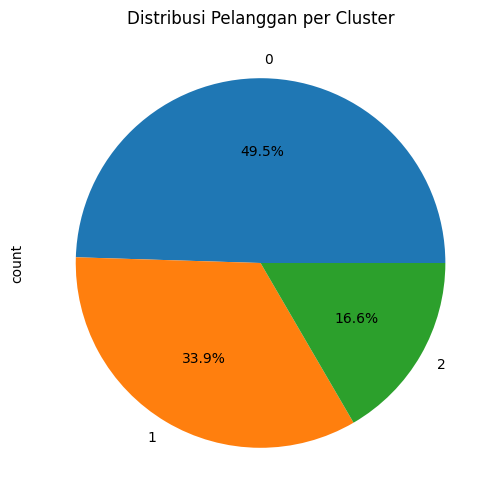

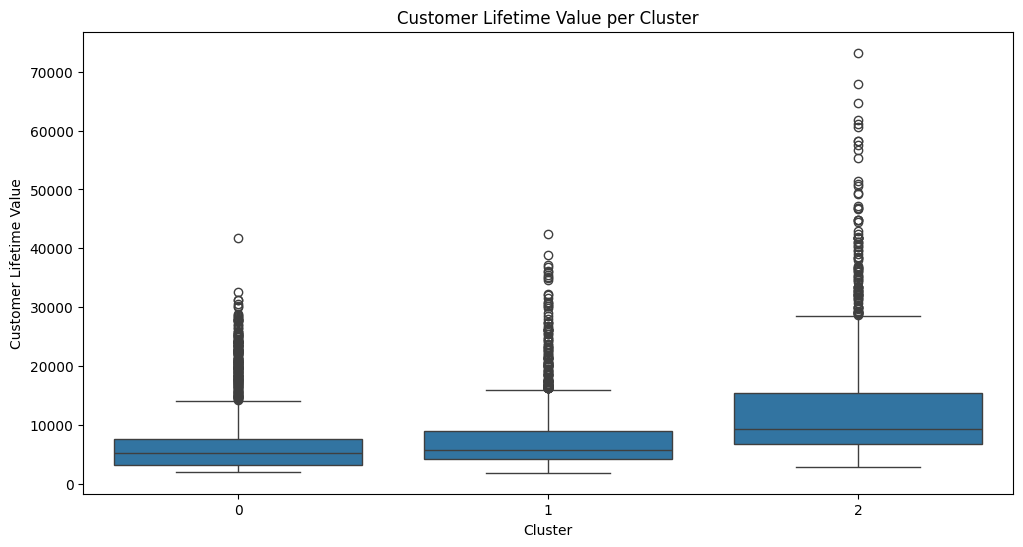

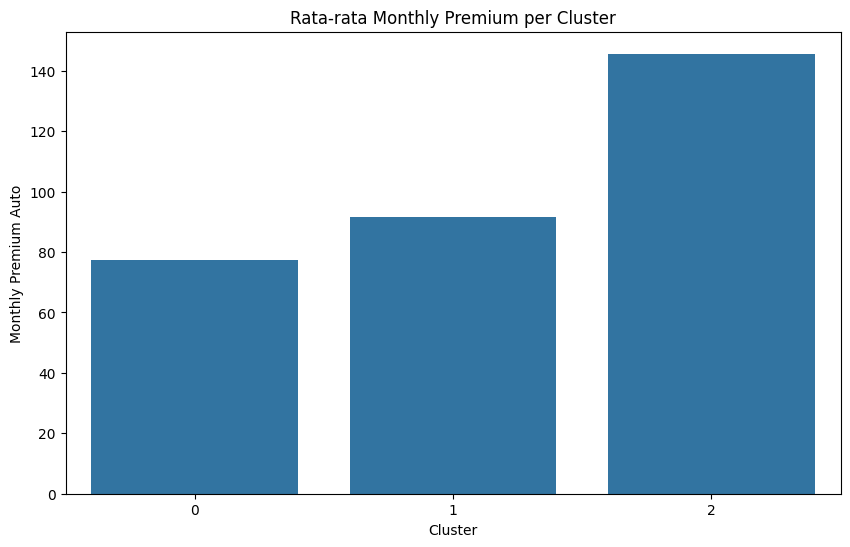

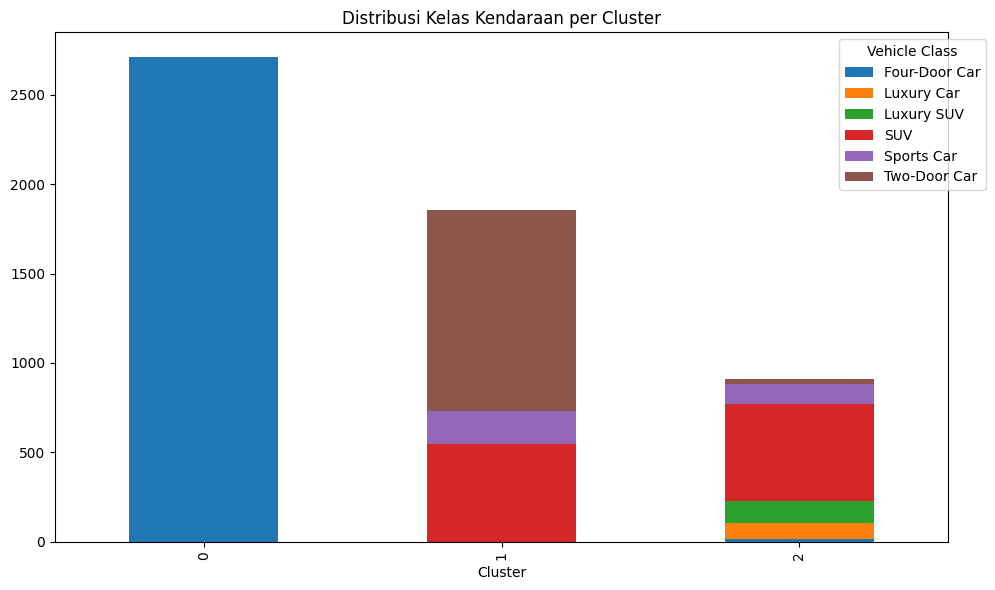

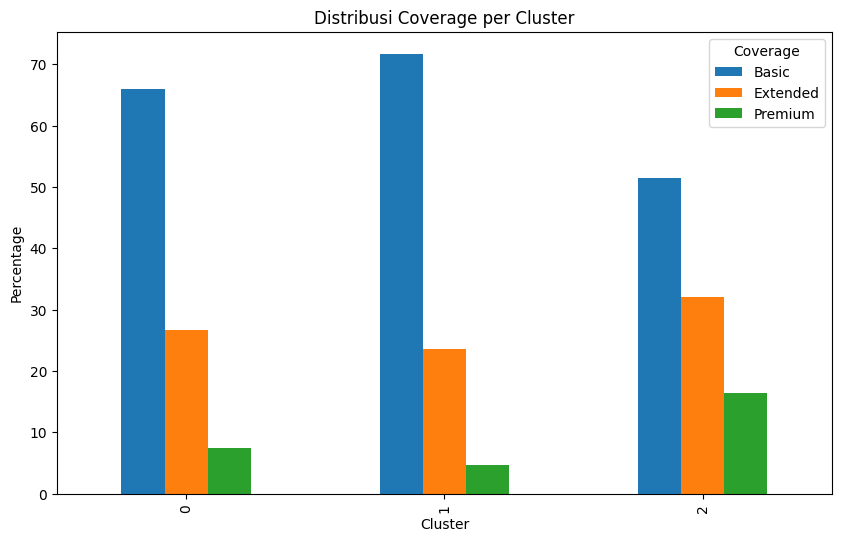

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pie Chart Distribusi Cluster
plt.figure(figsize=(8, 6))
data['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Pelanggan per Cluster')

# 2. Karakteristik Utama per Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Customer Lifetime Value', data=data)
plt.title('Customer Lifetime Value per Cluster')

# 3. Perbandingan Monthly Premium
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Monthly Premium Auto', data=data,
            ci=None, estimator=lambda x: x.mean())
plt.title('Rata-rata Monthly Premium per Cluster')

# 4. Vehicle Class Distribution
vehicle_dist = pd.crosstab(data['Cluster'], data['Vehicle Class'])
vehicle_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Kelas Kendaraan per Cluster')
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# 5. Coverage Distribution
coverage_dist = pd.crosstab(data['Cluster'], data['Coverage'], normalize='index') * 100
coverage_dist.plot(kind='bar', figsize=(10, 6))
plt.title('Distribusi Coverage per Cluster')
plt.ylabel('Percentage')